<h2 style="color:blue" align="left"> Read Data </h2>

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv("SOCR-HeightWeight.csv", index_col=0)
df.head()

,Height(Inches),Weight(Pounds)
Index,,
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971


In [6]:
df.shape

(25000, 2)

In [7]:
df.isnull().sum()

Height(Inches)    0
Weight(Pounds)    0
dtype: int64

In [8]:
df.describe()

,Height(Inches),Weight(Pounds)
count,25000.000000,25000.000000
mean,67.993114,127.079421
std,1.901679,11.660898
min,60.278360,78.014760
25%,66.704397,119.308675
50%,67.995700,127.157750
75%,69.272958,134.892850
max,75.152800,170.924000


<h2 style="color:blue" align="left"> EDA(Exploratory Data Analysis) </h2>

In [9]:
import matplotlib.style as style
style.use('fivethirtyeight')

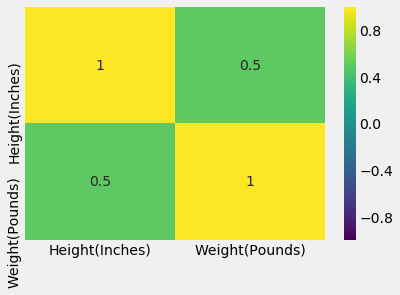

In [10]:
sns.heatmap(df.corr(), annot=True, cmap='viridis', vmax=1.0, vmin=-1.0 )

### Histgram for heights

Text(0, 0.5, 'Count')

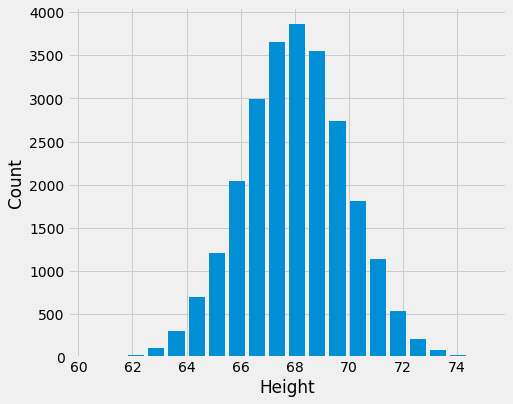

In [11]:
plt.figure(figsize=(7,6))
plt.hist(df['Height(Inches)'], bins=20, rwidth=0.8)
plt.xlabel('Height')
plt.ylabel('Count')

### Histgram for weights

Text(0, 0.5, 'Count')

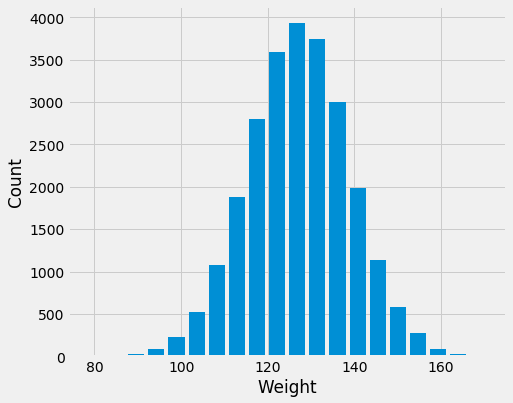

In [12]:
plt.figure(figsize=(7,6))
plt.hist(df['Weight(Pounds)'], bins=20, rwidth=0.8)
plt.xlabel('Weight')
plt.ylabel('Count')

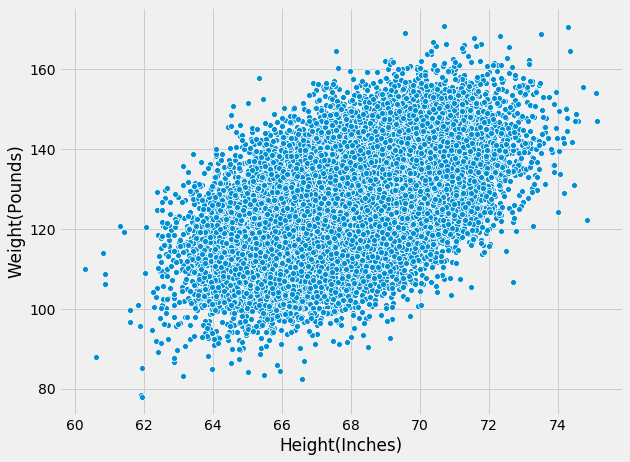

In [13]:
plt.figure(figsize=(9,7))
sns.scatterplot(df['Height(Inches)'], df['Weight(Pounds)'])

<h2 style="color:blue" align="left"> Outliers </h2>
<h3 style='color:purple'> 1. Detect outliers using IQR </h3>

### Detect outliers based on weight

In [14]:
Q1 = df['Weight(Pounds)'].quantile(0.25)
Q3 = df['Weight(Pounds)'].quantile(0.75)
Q1, Q3

(119.30867500000001, 134.89285)

In [15]:
IQR = Q3 - Q1
IQR

15.584175000000002

In [16]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(95.9324125, 158.2691125)

In [17]:
df['Weight(Pounds)'].describe()

count    25000.000000
mean       127.079421
std         11.660898
min         78.014760
25%        119.308675
50%        127.157750
75%        134.892850
max        170.924000
Name: Weight(Pounds), dtype: float64

In [18]:
df[(df['Weight(Pounds)']<lower_limit)|(df['Weight(Pounds)']>upper_limit)]

,Height(Inches),Weight(Pounds)
Index,,
157,70.98112,158.95620
250,65.93895,84.35980
294,69.13438,92.74955
368,72.32489,168.22900
447,69.16807,162.41090
473,65.69989,93.99438
699,65.75638,95.20216
728,63.12550,83.08527
734,64.96937,95.70426


### Detect outliers based on height

In [19]:
Q1 = df['Height(Inches)'].quantile(0.25)
Q3 = df['Height(Inches)'].quantile(0.75)
Q1, Q3

(66.7043975, 69.2729575)

In [20]:
IQR = Q3 - Q1
IQR

2.568560000000005

In [21]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(62.85155749999999, 73.1257975)

In [22]:
df[(df['Height(Inches)']<lower_limit)|(df['Height(Inches)']>upper_limit)]

,Height(Inches),Weight(Pounds)
Index,,
139,73.90107,151.39130
175,73.83364,139.29830
270,73.26872,130.26360
413,62.01666,109.08480
1134,62.75039,114.49000
1163,74.24899,150.21670
1245,62.64242,100.19820
1384,74.19488,129.05970
1449,73.38109,154.81780


<h3 style='color:purple'> 2. Remove outliers </h3>

In [23]:
df_no_outlier_Height = df[(df['Height(Inches)']>lower_limit)&(df['Height(Inches)']<upper_limit)]
df_no_outlier_Height

,Height(Inches),Weight(Pounds)
Index,,
1,65.78331,112.99250
2,71.51521,136.48730
3,69.39874,153.02690
4,68.21660,142.33540
5,67.78781,144.29710
6,68.69784,123.30240
7,69.80204,141.49470
8,70.01472,136.46230
9,67.90265,112.37230


In [24]:
data = pd.DataFrame(df_no_outlier_Height)
data.head()

,Height(Inches),Weight(Pounds)
Index,,
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971


In [25]:
data.shape

(24833, 2)

### Data Preprocessing

In [26]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [29]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(20000, 1) (5000, 1) (20000,) (5000,)


### Linear Regression

In [30]:
LinReg = LinearRegression()
LinReg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [31]:
y_pred = LinReg.predict(X_test)
y_pred

array([123.33549794, 134.00612771, 124.67667359, ..., 125.68063341,
       130.43237501, 123.04698086])

In [32]:
y_train

Index
10264    121.86020
18410    132.74500
13048    131.88850
21372    120.74580
16393    146.26670
21486    135.34660
2040     141.13970
13862    150.27120
550      118.42330
22868    151.16590
3991     132.63940
16831    122.02590
24708    133.07030
1245     100.19820
12291    116.93750
14688    129.50480
19730    111.66400
21990    117.08860
10444    142.61490
902      110.46780
4027     145.18820
9089     125.11570
5245     144.99080
8869     140.75970
11287    118.66970
23842    130.75530
9555     111.53980
19152    122.34140
6848     127.96370
3161     118.30910
           ...    
4852     122.74680
5073     130.86430
2164     121.76560
6037     144.88100
6922     148.26120
6217     133.09000
16922    144.49810
2898     136.17960
24153    126.62890
18607    112.85730
10328    119.05780
18984    137.79510
17090    116.62850
14651    135.05490
19853    123.12910
6745     123.54930
15833    131.38910
15431    128.31040
14936    114.96120
14117     96.95428
22259    127.19020
20758 

In [35]:
LinReg.score(X_test, y_test)

0.25883302999241287